# MovieLens - Exploracyjna analiza danych

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle
import time

## Ramki danych

In [2]:
genome_scores = pd.read_csv('ml-latest/genome-scores.csv')
genome_tags = pd.read_csv('ml-latest/genome-tags.csv')
links = pd.read_csv('ml-latest/links.csv')
movies = pd.read_csv('ml-latest/movies.csv')
ratings = pd.read_csv('ml-latest/ratings.csv')
tags = pd.read_csv('ml-latest/tags.csv')

In [3]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [59]:
df = genome_scores.head(8)
d = genome_scores.describe()
display_side_by_side(df,d,titles = ['Genome_scores', 'Description'])

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000
5,1,6,0.19525
6,1,7,0.07600
7,1,8,0.25200
,movieId,tagId,relevance
count,1.486253e+07,1.486253e+07,1.486253e+07


In [41]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [60]:
genome_scores.shape

(14862528, 3)

In [44]:
df = genome_tags.head(8)
d = genome_tags.describe()
display_side_by_side(df,d,titles = ['Genome_tags', 'Description'])

Genome_tags 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 5 
 6 
 1950s 
 
 
 6 
 7 
 1960s 
 
 
 7 
 8 
 1970s 
 
 
 Description 
 
 
 
 tagId 
 
 
 
 
 count 
 1128.000000 
 
 
 mean 
 564.500000 
 
 
 std 
 325.769857 
 
 
 min 
 1.000000 
 
 
 25% 
 282.750000 
 
 
 50% 
 564.500000 
 
 
 75% 
 846.250000 
 
 
 max 
 1128.000000

In [45]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [61]:
genome_tags.shape

(1128, 2)

### Opis ramek *Genome_scores* i *Genome_tags*
W naszym zbiorze algorytm, powstały na zasadzie uczenia maszynowego, stworzył ramkę danych zawierającą tagi przyporządkowane różnym filmom. Ramka ta później została podzielona na dwie oddzielne. Ramka **Genome_scores** zawiera kolumny *movieID*, *tagID* oraz *relevance*.
* **movieID** - zawiera ID filmu, potrzebne do jego identyfikacji;
* **tagID** - zawiera ID taga; dzięki temu z ramki **Genome_tags** możemy odczytać jaki tag został przypisany do naszego filmu;
* **relevance** - określa trafność przypisanego tagu do danego filmu.

Ramka **Genome_tags** zawiera kolumny *tagID* oraz *tag*.
* **tagID** - zawiera ID taga;
* **tag** - zawiera nazwę konkretnego tagu.

In [56]:
df = links.head(8)
d = links.describe()
display_side_by_side(df,d,titles = ['Links', 'Description'])

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
,movieId,imdbId,tmdbId
count,58098.000000,5.809800e+04,57917.000000


In [57]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   57917 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [62]:
links.shape

(58098, 3)

### Opis ramki *Links*
Ramka **Links** służy do identyfikacji filmów na stronach **movielens.org**, **imdb.com** oraz **themoviedb.org**. Zawiera kolumny *movieID*, *imdbID* oraz *tmdbID*
* **movieID** - identyfikator filmu na stronie  https://movielens.org;
* **imdbID** - identyfikator filmu na stronie http://www.imdb.com;
* **tmdbID** - identyfikator filmu na stonie https://www.themoviedb.org.

In [47]:
df = movies.head(8)
d = movies.describe()
display_side_by_side(df,d,titles = ['Movies', 'Description'])

Movies 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 5 
 6 
 Heat (1995) 
 Action|Crime|Thriller 
 
 
 6 
 7 
 Sabrina (1995) 
 Comedy|Romance 
 
 
 7 
 8 
 Tom and Huck (1995) 
 Adventure|Children 
 
 
 Description 
 
 
 
 movieId 
 
 
 
 
 count 
 58098.000000 
 
 
 mean 
 111919.516197 
 
 
 std 
 59862.660956 
 
 
 min 
 1.000000 
 
 
 25% 
 72437.750000 
 
 
 50% 
 126549.000000 
 
 
 75% 
 161449.500000 
 
 
 max 
 193886.000000

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [63]:
movies.shape

(58098, 3)

### Opis ramki *Movies*
Ramka **Movies** pozwala nam na identyfikację filmu za pomocą jego ID. Zawiera kolumny *movieID*, *title* oraz *genres*.
* **movieID** - zawiera ID danego filmu potrzebne do jesgo identyfikacji;
* **title** - zawiera tytuł filmu, wprowadzony manualnie lub zimportowany ze strony themoviedb.org;
* **genres** - zawiera nazwę gatunku danego filmu.

Wszystkie gatunki zawarte w kolumnie *genres*:
* Action;
* Adventure;
* Animation;
* Children's;
* Comedy;
* Crime;
* Documentary;
* Drama;
* Fantasy;
* Film-Noir;
* Horror;
* Musical;
* Mystery;
* Romance;
* Sci-Fi;
* Thriller;
* War;
* Western.

In [50]:
df = ratings.head(8)
d = ratings.describe()
display_side_by_side(df,d,titles = ['Ratings', 'Description'])

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07


In [51]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [64]:
ratings.shape

(27753444, 4)

### Opis ramki *Ratings*
W ramce **Ratings** zawarte są oceny filmów. W każdym wierszu znajdziemy informacje dotyczące jednej opinii o jednym filmie wystawionej przez jednego użytkownika. Ramka posiada kolumny *userID*, *movieID*, *rating* oraz *timestamp*.
* **userID** - zawiera ID użytkownika, który wystawił daną opinię;
* **movieID** - zawiera ID filmu o którym została wystawiona opinia;
* **rating** - ocena filmu w skali od 0.5 gwiazdki do 5 gwiazdek (co 0.5 gwiazdki);
* **timestamp** - czas mierzony w sekundach od 1. stycznia 1970 roku.

In [53]:
df = tags.head(8)
d = tags.describe()
display_side_by_side(df,d,titles = ['Tags', 'Description'])

Tags 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 14 
 110 
 epic 
 1443148538 
 
 
 1 
 14 
 110 
 Medieval 
 1443148532 
 
 
 2 
 14 
 260 
 sci-fi 
 1442169410 
 
 
 3 
 14 
 260 
 space action 
 1442169421 
 
 
 4 
 14 
 318 
 imdb top 250 
 1442615195 
 
 
 5 
 14 
 318 
 justice 
 1442615192 
 
 
 6 
 14 
 480 
 Dinosaurs 
 1443148563 
 
 
 7 
 14 
 593 
 psychothriller 
 1444014286 
 
 
 Description 
 
 
 
 userId 
 movieId 
 timestamp 
 
 
 
 
 count 
 1.108997e+06 
 1.108997e+06 
 1.108997e+06 
 
 
 mean 
 1.248016e+05 
 5.492109e+04 
 1.413544e+09 
 
 
 std 
 7.726964e+04 
 5.618123e+04 
 1.144358e+08 
 
 
 min 
 1.400000e+01 
 1.000000e+00 
 1.135429e+09 
 
 
 25% 
 7.340600e+04 
 3.362000e+03 
 1.323903e+09 
 
 
 50% 
 1.030130e+05 
 4.374400e+04 
 1.446994e+09 
 
 
 75% 
 1.883600e+05 
 9.682100e+04 
 1.525549e+09 
 
 
 max 
 2.832210e+05 
 1.938680e+05 
 1.537945e+09

In [54]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1108997 non-null  int64 
 1   movieId    1108997 non-null  int64 
 2   tag        1108981 non-null  object
 3   timestamp  1108997 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [65]:
tags.shape

(1108997, 4)

### Opis ramki *Tags*
W ramce **Ratings** każdy wiersz zwiera informację o tagu przyporządkowanym przez danego użytkownika do wybranego filmu. Ramka posiada kolumny *userID*, *movieID*, *tag* oraz *timestamp*.
* **userID** - zawiera ID użytkownika, który wystawił daną opinię;
* **movieID** - zawiera ID filmu o którym została wystawiona opinia;
* **tag** - tag dopasowany do filmu przez danego użytkownika;
* **timestamp** - czas mierzony w sekundach od 1. stycznia 1970 roku.

Brakujące dane występują w ramce **links** w kolumnie *tmdbID* oraz w ramce **tags** w kolumnie *tag*.

## Rozkłady zmiennych

Zmienne w kolmnie *tagId* w ramce **Genome_tags** są unikalne zatem ich rozkłąd jest jednostajny.

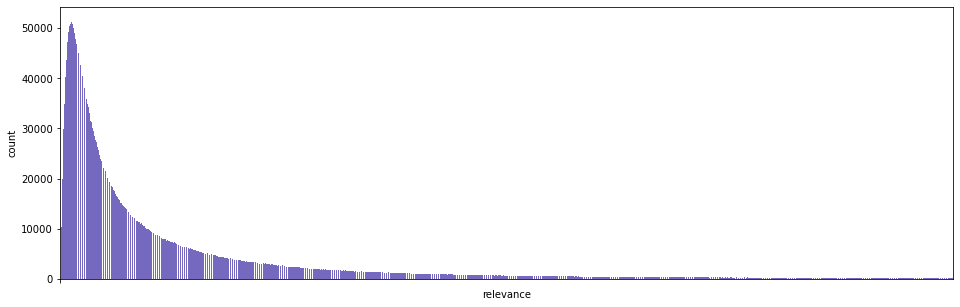

In [13]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'relevance', data=genome_scores, color = 'slateblue')
t = [genome_scores['relevance'].min()]
plt.xticks(t)
plt.show()

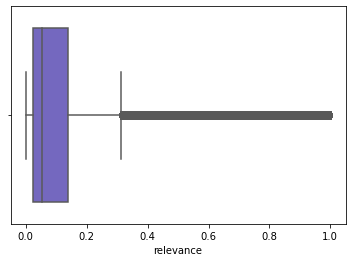

In [9]:
sns.boxplot(x = 'relevance', data=genome_scores, color = 'slateblue')
plt.show()

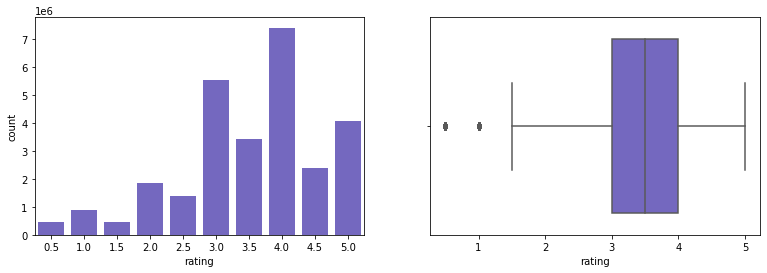

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13, 4)
sns.countplot(x = 'rating', data=ratings, ax=ax[0],color = 'slateblue')
sns.boxplot(x = 'rating', data=ratings, ax=ax[1], color = 'slateblue')
plt.show()

W ramkach, w których występuje kolumna *timestamp* stworzymy kolejną kolumnę *date* w celu lepszej analizy czasu, w którym zostały wystawione oceny lub przypisane tagi.

In [5]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['date'] = pd.to_datetime(tags['timestamp'], unit='s')

W ramce **Movies** dodamy nową kolumnę *year* zawierającą rok premiery danego filmu

In [145]:
strings = movies.title.tolist()
list_t = []
for string in strings:
    list_t.append((''.join(char for char in string if char.isdigit()))[-4:])
l = []
for i in list_t:
    if i != '':
        l.append(int(i))
    else:
        l.append(0)
movies['year'] = l

In [146]:
display_side_by_side(ratings.head(8),tags.head(8), movies.head(8),titles = ['Ratings', 'Tags', 'Movies'])

,userId,movieId,rating,timestamp,date
0,1,307,3.5,1256677221,2009-10-27 21:00:21
1,1,481,3.5,1256677456,2009-10-27 21:04:16
2,1,1091,1.5,1256677471,2009-10-27 21:04:31
3,1,1257,4.5,1256677460,2009-10-27 21:04:20
4,1,1449,4.5,1256677264,2009-10-27 21:01:04
5,1,1590,2.5,1256677236,2009-10-27 21:00:36
6,1,1591,1.5,1256677475,2009-10-27 21:04:35
7,1,2134,4.5,1256677464,2009-10-27 21:04:24
,userId,movieId,tag,timestamp,date
0,14,110,epic,1443148538,2015-09-25 02:35:38


Sprawdźmy, które gatunki występują najczęściej

<ipython-input-139-09971564c2c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["genres_new"] = movies['genres'].str.replace('[^\w\s]', ' ')


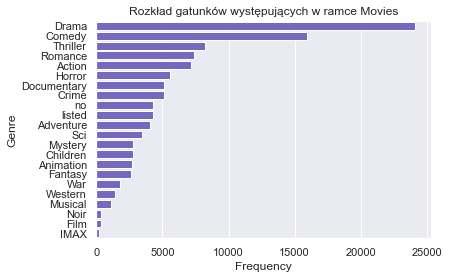

In [139]:
df = pd.DataFrame()
df["genres_new"] = movies['genres'].str.replace('[^\w\s]', ' ')
new_df = df.genres_new.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Genre', 'Frequency']
new_df = new_df[new_df.Genre != 'Fi']
new_df = new_df[new_df.Genre != 'genres']
#new_df['Genre'].replace(to_replace ="Sci", value ="Sci Fi")
#fig.set_size_inches(40, 10)
sns.barplot(y = 'Genre', x = 'Frequency', data=new_df, color = 'slateblue').set(title='Rozkład gatunków występujących w ramce Movies')
plt.show()

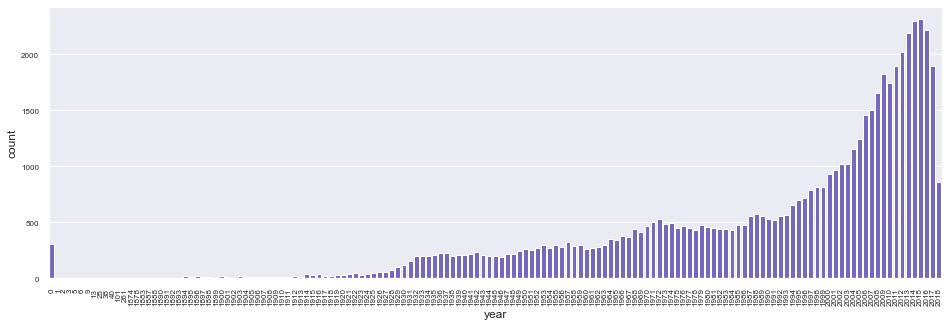

In [148]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'year', data=movies,color = 'slateblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

## Uzupełnienie braków danych

### Braki w kolumnie *tmdbId*
Każdy film ma swój unikalny numer potrzebny do odnalezienia go w bazie themoviedb, zatem puste komórki uzupełnimy wartością 0.0, która będzie mówić o tym, że podanego filmu nie ma w danej bazie.

In [151]:
links['tmdbId'].fillna(0.0, inplace=True)
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   58098 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


### Braki w kolumnie *tag*
Aby zlikwidować braki danych w kolumnie tag, wystarczy usunąć określone wiersze. Celem ramki **Tags** jest wskazanie nam jaki tag przypisał dany użytkownik danemu filmu. Dodatkowo z powyższej analizy widzimy, że na ponad milion wierszy brakuje raptem kilkanaście wartości. Zatem jeśli kolumna tag ma pustą komórkę, nie jest nam ona do niczego potrzebna. 

In [153]:
tags = tags.dropna()
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108981 entries, 0 to 1108996
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   userId     1108981 non-null  int64         
 1   movieId    1108981 non-null  int64         
 2   tag        1108981 non-null  object        
 3   timestamp  1108981 non-null  int64         
 4   date       1108981 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 50.8+ MB
